# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [3]:
# read the titanic train.csv file into a dataframe
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# show the percentage of the passengers that boarded at different ports
df_train.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<AxesSubplot:>

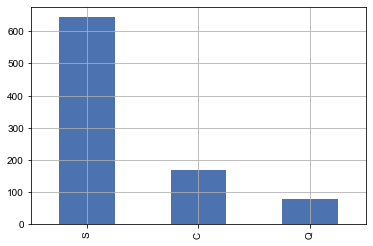

In [5]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
plt.style.use('seaborn') 
df_train.Embarked.value_counts().plot.bar()


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [6]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
df_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

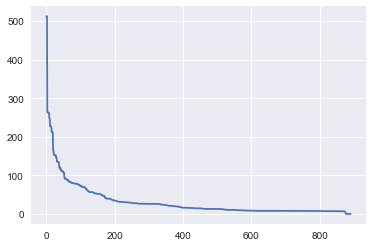

In [7]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
df_sorted = df_train.sort_values(by='Fare', ascending=False)
plt.figure(figsize=(6, 4))
plt.plot(df_sorted['Fare'].values)


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



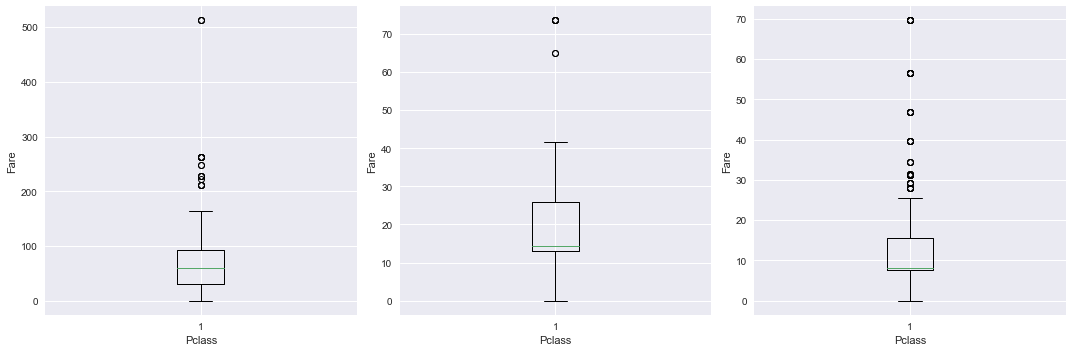

In [8]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, pclass in enumerate(sorted(df_sorted['Pclass'].unique())):
    axs[i].boxplot(df_sorted[df_sorted['Pclass'] == pclass]['Fare'].dropna())  
    axs[i].set_xlabel('Pclass')
    axs[i].set_ylabel('Fare')
plt.tight_layout()
plt.show()

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [8]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
# Calculate the survival rate for each ticket class
survival_rate = df_train.groupby('Pclass')['Survived'].mean() 
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

People with ticket class 1 have the highest survival rate 0.629630

In [223]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
# Calculate the survival rate for each ticket class



Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<BarContainer object of 6 artists>

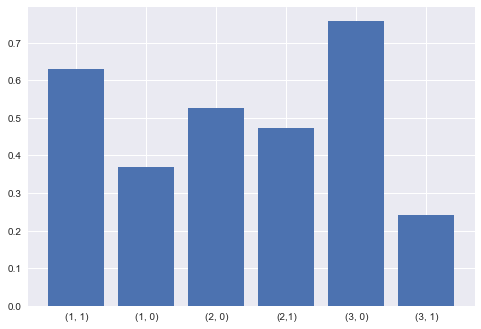

In [9]:
rate_1_1 = df_train[df_train['Pclass'] == 1]['Survived'].mean()
rate_1_0 = 1 - df_train[df_train['Pclass'] == 1]['Survived'].mean()
rate_2_1 = df_train[df_train['Pclass'] == 2]['Survived'].mean()
rate_2_0 = 1 - df_train[df_train['Pclass'] == 2]['Survived'].mean()
rate_3_1 = df_train[df_train['Pclass'] == 3]['Survived'].mean()
rate_3_0 = 1 - df_train[df_train['Pclass'] == 3]['Survived'].mean()
x = ['(1, 1)', '(1, 0)', '(2, 0)', '(2,1)', '(3, 0)', '(3, 1)']
y = [rate_1_1, rate_1_0, rate_2_0, rate_2_1, rate_3_0, rate_3_1]
fig, ax = plt.subplots() 
ax.bar(x, y)

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
